# A basic look at Salary and Remote Working Status
### Based on Stack Overflow Data

In [7]:
print('-'*80)

--------------------------------------------------------------------------------


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 5000)

df = pd.read_csv('./survey_results_public.csv')
df_schema = pd.read_csv('./survey_results_schema.csv')

df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [10]:
def cleaning_function(df):
    '''
    INPUT: Raw dataframe from stack exchange
    
    OUTPUT: Dataframe cleaned in an appropriate manner for future
            analysis. Some data points might be excluded or columns
            transformed.
    '''
    df = df[(
        df.EmploymentStatus.ne('Not employed, and not looking for work')&
        df.EmploymentStatus.ne('Not employed, but looking for work')&
        df.EmploymentStatus.ne('Retired')&
        df.Country.eq('United States')
        )] # current analysis focused on us working population
    
    return df
    

In [11]:
df = cleaning_function(df)

### A look at salary distributions across different remote working status

In [45]:
(df[['Salary', 'HomeRemote']]
 .groupby('HomeRemote')
 .describe(percentiles=[.10,.25,.50,.75,.90])
 .astype(int))


Salary                     \
                                                    count   mean    std  min   
HomeRemote                                                                     
A few days each month                                1978  61029  40479    0   
About half the time                                   129  59578  45179    0   
All or almost all the time (I'm full-time remote)     380  79566  46816  138   
It's complicated                                      246  55434  36379    0   
Less than half the time, but at least one day e...    466  66757  45306  297   
More than half, but not all, the time                 113  57697  45905  123   
Never                                                1692  48406  34897    0   

                                                                         \
                                                      10%    25%    50%   
HomeRemote                                                                
A few days each month                                8859  30000  56689   
About half the time                                  3073  19354  58064   
All or almost all the time (I'm full-time remote)   16650  40000  79772   
It's complicated                                    12633  28196  47234   
Less than half the time, but at least one day e...   7670  31317  64516   
More than half, but not all, the time                3853  14709  50000   
Never                                                7060  23691  43010   

                                                                            
                                                       75%     90%     max  
HomeRemote                                                                  
A few days each month                                86021  118835  193750  
About half the time                                  90000  121600  174000  
All or almost all the time (I'm full-time remote)   115000  140000  195000  
It's complicated                                     75000  108030  187500  
Less than half the time, but at least one day e...   95000  130000  185000  
More than half, but not all, the time                90000  119040  178000  
Never                                                65000   95000  195000

Interesting that salraies are highest by a substantial amount for remote workers and lowest for people who never work remotely across all quantiles and averages (by about 50% at every quantile)

In [115]:
(df[['Salary', 'HomeRemote']]
 .groupby('HomeRemote')
 .describe(percentiles=[.10,.25,.50,.75,.90])
 .astype(int)
 .loc[['Never', "All or almost all the time (I'm full-time remote)"]]
 .style.bar(color='#00C752'))

/anaconda3/lib/python3.6/site-packages/pandas/io/formats/style.py:960: RuntimeWarning: divide by zero encountered in long_scalars
  zero_normed = width * (0 - s.min()) / (s.max() - s.min())


### A look at salary differences across pay scale for remote vs non remote workers

In [116]:
salary_df = pd.DataFrame()
for cats in enumerate(['Never',
                       "All or almost all the time (I'm full-time remote)", 
                       'A few days each month']):
    new_ent = (df[['Salary', 'HomeRemote']]
     .groupby('HomeRemote')
     .describe(percentiles=np.arange(0,1.1,.1).astype(list))
     .astype(int)
     .loc[['Never', 
           "All or almost all the time (I'm full-time remote)", 
           'A few days each month']]
     .iloc[:,4:15]
     .loc[cats[1]].reset_index(drop=True))
    salary_df = salary_df.append(new_ent)
salary_df = salary_df.T

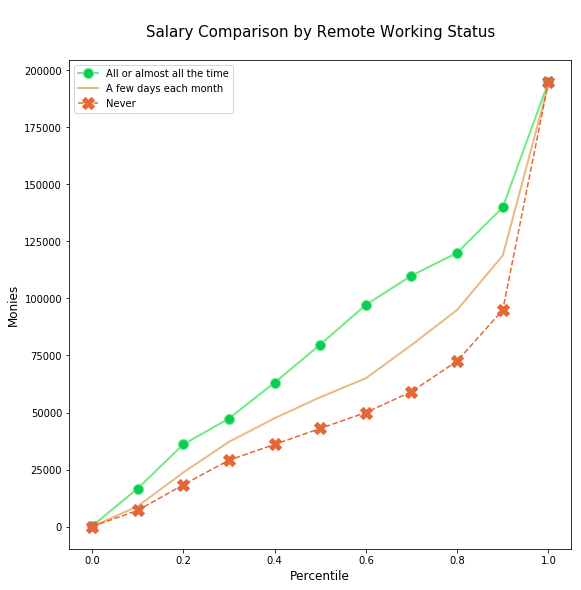

In [135]:
# Need to format more when getting ready to go into the blog post
# Maybe put some data labels for all the points or some select ones 
# in the beginning and middle.

plt.figure(figsize=(9, 9))
plt.plot(
    np.arange(0,1.1,.1), salary_df.columns[1], data=salary_df, 
    marker='o', markerfacecolor='#08CC59', markersize=10, 
    color='#70EB84', linewidth=2, label='All or almost all the time')
plt.plot(
    np.arange(0,1.1,.1), salary_df.columns[2], data=salary_df, 
    marker='', color='#EBB984', linewidth=2)
plt.plot(
    np.arange(0,1.1,.1), salary_df.columns[0], data=salary_df, 
    marker='X', markersize=12, color='#E46739', linewidth=1.5, 
    linestyle='dashed')
plt.title(
    '\nSalary Comparison by Remote Working Status\n', 
    fontsize=15)
plt.xlabel('Percentile', fontsize=12)
plt.ylabel('Monies', fontsize=12)
plt.legend();


The median range of salaries looks to have the largest spread in wage increases for those workers who work remotely.